Checkpoint 2

In [12]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
# Import data from data/results-[year] from 1999 to 2019
START_YEAR = 1999
END_YEAR = 2019

# Create a list of dataframes
dfs = []
for year in range(START_YEAR, END_YEAR + 1):
    df = pd.read_csv(f'./data/results-{year}.csv')
    df['year'] = year
    dfs.append(df)

# Concatenate all dataframes
results = pd.concat(dfs, ignore_index=True)

# Drop rows with missing values
results = results.dropna()
print(results.head())

   place_overall first_name last_name nationality     club time_full gender  \
0              1   Josephat   Kiprono         KEN    Kenia  02:06:44      M   
1              2   Takayuki  Inubushi         JPN    Japan  02:06:57      M   
2              3     Samson    Kandie         KEN    Kenia  02:08:31      M   
3              4     Hicham     Chatt         MAR  Marokko  02:09:56      M   
4              5      Henry   Cherono         KEN    Kenia  02:10:37      M   

   split_5k split_10k split_15k split_20k time_half split_25k split_30k  \
0  00:15:09  00:30:21  00:45:25  01:00:34  01:03:54  01:14:54  01:30:10   
1  00:15:09  00:30:21  00:45:27  01:00:36  01:03:54  01:14:56  01:30:18   
2  00:15:10  00:30:21  00:45:27  01:00:35  01:03:54  01:14:55  01:30:18   
3  00:15:11  00:30:23  00:45:27  01:00:36  01:03:55  01:14:56  01:30:24   
4  00:15:10  00:30:21  00:00:00  01:00:35  01:03:55  01:14:55  01:30:18   

  split_35k split_40k    Race  year  
0  01:45:05  02:00:08  Berlin  1999 

       place_overall     year
count   43936.000000  43936.0
mean    12735.455595   2019.0
std      8693.329773      0.0
min         1.000000   2019.0
25%      5497.750000   2019.0
50%     10995.000000   2019.0
75%     19731.250000   2019.0
max     30742.000000   2019.0


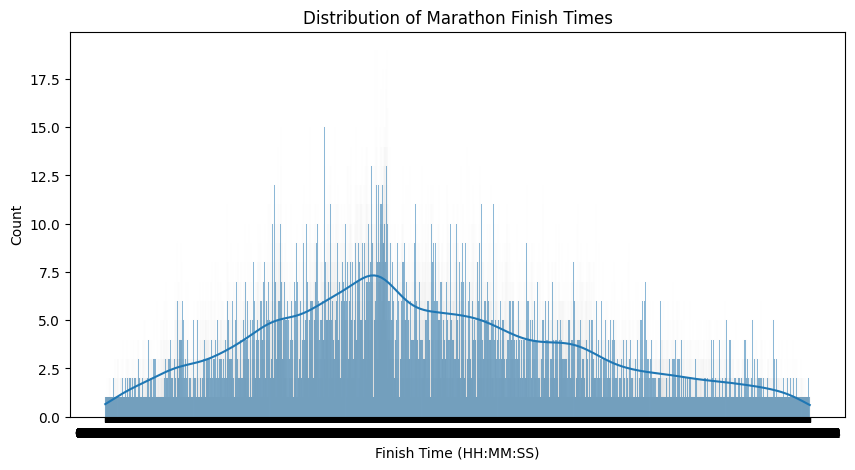

In [19]:
# Summary statistics
print(df.describe())
#1 descriptive statistic

# Histogram of finish times
plt.figure(figsize=(10,5))
sns.histplot(df['time_full'], bins=30, kde=True)
plt.title('Distribution of Marathon Finish Times')
plt.xlabel('Finish Time (HH:MM:SS)')
plt.ylabel('Count')
plt.show()